In [6]:
import os
import pathlib

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pf=pd.read_csv("C:/Users/DS3/Downloads/mpg_raw(1).csv")

In [14]:
pf.shape

(398, 9)

In [15]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
pf.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [18]:
pf.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [19]:
pf.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [20]:
pf.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

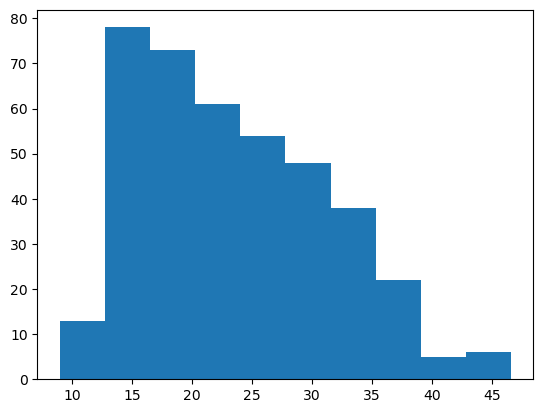

In [22]:
plt.hist(pf['mpg'])

<Axes: xlabel='cylinders', ylabel='weight'>

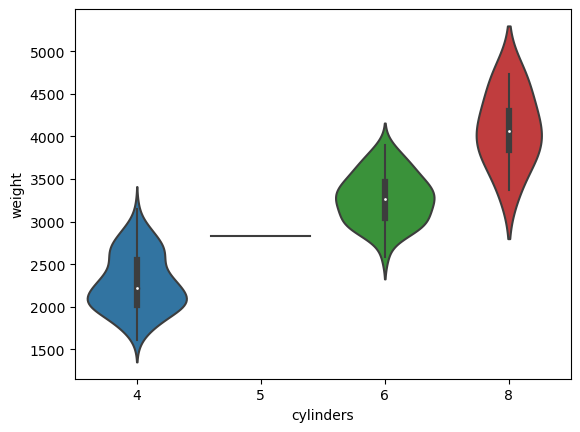

In [44]:
sns.violinplot(x='cylinders',y='weight',data=pf)

<Axes: >

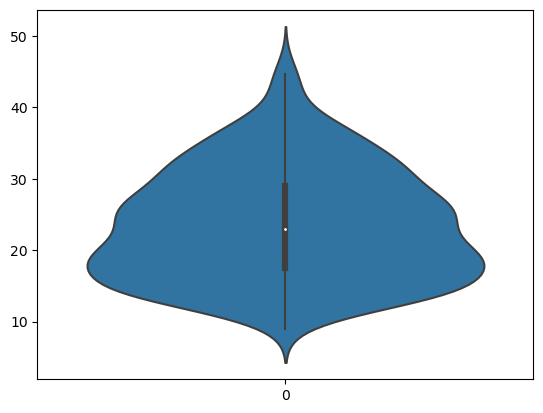

In [27]:
sns.violinplot(pf['mpg'])

C:\Users\DS3\AppData\Local\Temp\ipykernel_30036\153625782.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pf.corr(method='spearman'),annot=True,vmin=1,vmax=1);


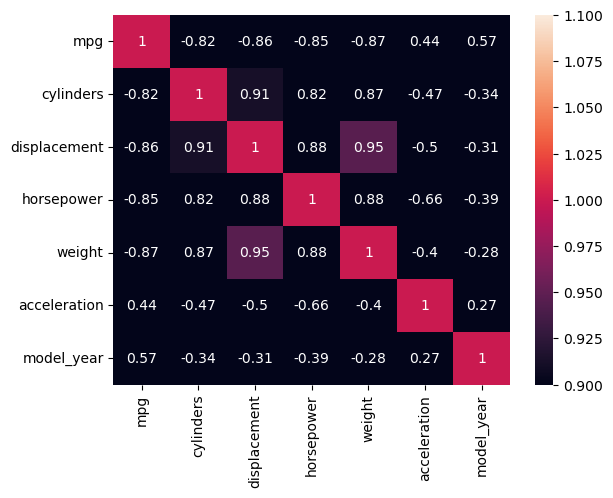

In [31]:
sns.heatmap(pf.corr(method='spearman'),annot=True,vmin=1,vmax=1);

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad0f70ad70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad0f70b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad0f70aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad0f70b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad0f70bac0>],
 'means': []}

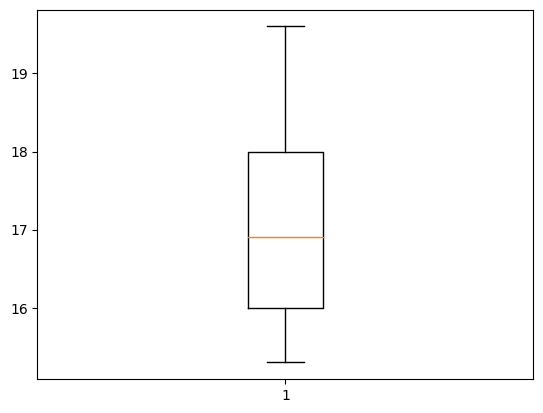

In [46]:
plt.boxplot(pf['acceleration'])

In [41]:
Q1 = pf['acceleration'].quantile(0.75)
Q3 = pf['acceleration'].quantile(0.85)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
print(lower_fence, upper_fence)

17.0
18.155
1.1550000000000011
15.267499999999998 19.887500000000003


{'whiskers': [<matplotlib.lines.Line2D at 0x1ad0ba9d780>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad0baf8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad0ba86c20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad0baf9810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad0bafa260>],
 'means': []}

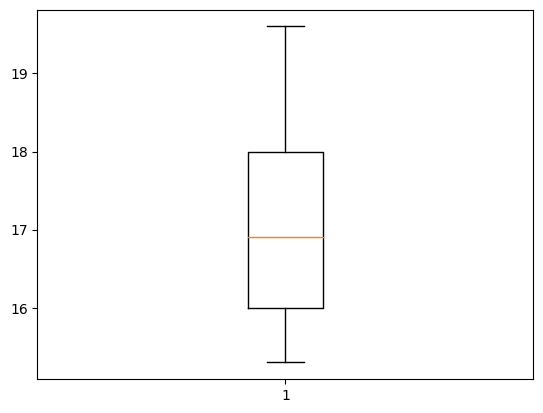

In [42]:
pf=pf[(pf['acceleration']>=lower_fence)&(pf['acceleration']<=upper_fence)]
plt.boxplot(pf['acceleration'])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
con = pf.select_dtypes(include=["int64","float64"]).columns
standard=scaler.fit_transform(pf[con])
print(standard)

[[-0.51118906  1.01291992  0.66219239 ...  0.23380984 -1.23069865
  -1.87402949]
 [-1.09593834  1.01291992  0.67705979 ...  0.14215989 -1.23069865
  -1.87402949]
 [-0.65737638  1.01291992  0.69192719 ... -0.14832387 -0.83478601
  -1.87402949]
 ...
 [ 0.21974753 -0.71041895 -0.20011678 ...  0.16701411 -1.15151613
   1.50012098]
 [ 0.36593485 -0.71041895 -0.49746477 ... -0.08929508  1.22395972
   1.50012098]
 [ 0.80449681 -0.71041895 -0.51233217 ...  0.05827688  1.85741994
   1.50012098]]
